# Workflow

* `Data (preparation and load)`.
* `Build Model`.
* `Fitting the model to data (training)`.
* `Inference and evaluation of model`.
* `Saving and Loading a model`.

In [1]:
# Importing libraries
import torch as pt
from torch import nn
import matplotlib.pyplot as plt

## **Data (preparation and loading)**

In [2]:
# generating random data points using LINEAR regression
# y = wx + b where w are weights and b is bias

# initializing parameters for Linear Regression
weight = 0.7
bias = 0.2

# initializing parameters for data points generation
start = 0
end = 1
step = 0.02

# generating data points
X = pt.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [3]:
# priniting sample data points generated
print(X[:10], "\n", y[:10], "\n", X.shape, "\n", y.shape)

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]) 
 tensor([[0.2000],
        [0.2140],
        [0.2280],
        [0.2420],
        [0.2560],
        [0.2700],
        [0.2840],
        [0.2980],
        [0.3120],
        [0.3260]]) 
 torch.Size([50, 1]) 
 torch.Size([50, 1])


## Train Test Split

In [4]:
# train test split
split = int(0.8 * len(X))

X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

torch.Size([40, 1]) torch.Size([40, 1]) torch.Size([10, 1]) torch.Size([10, 1])


## Visualizing data

In [5]:
# visualizing data points
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
    """
    Plots training data, test data and predictions.
    """

    plt.figure(figsize=(10,7))

    # Plot training data points in blue
    plt.scatter(x=train_data, y=train_labels, c="b", s=4, label="Training data")

    # Plot test data points in red
    plt.scatter(x=test_data, y=test_labels, c="r", s=4, label="Testing data")

    # Plot the predictions in green
    if predictions is not None:
        plt.scatter(x=test_data, y=predictions, c="g", s=4, label="Predictions")

    # Legend
    plt.legend(prop={"size": 12})

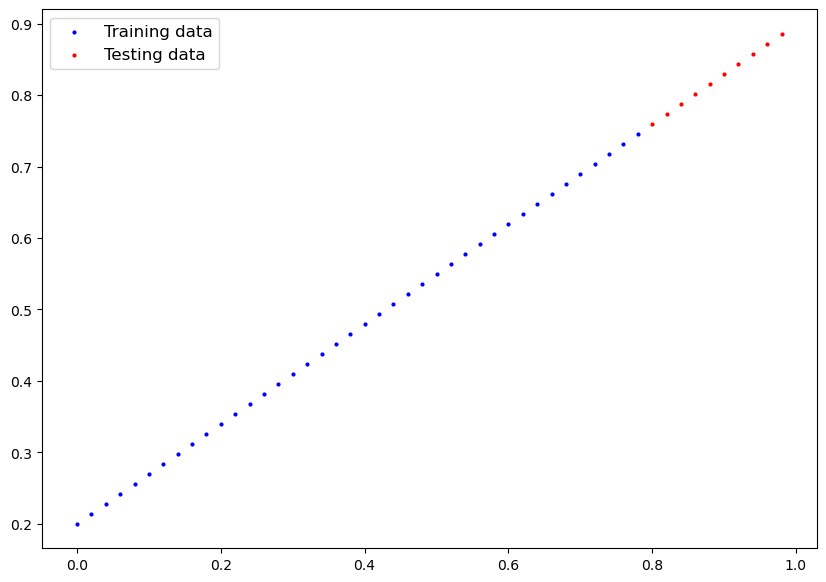

In [6]:
plot_predictions()

## Model Training and Inference

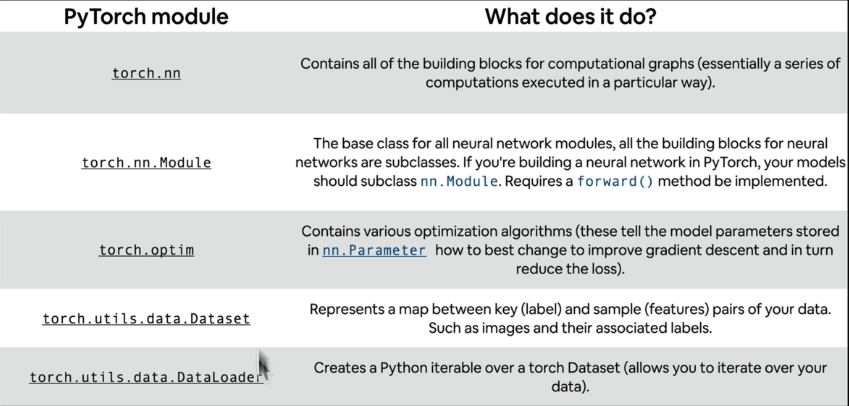

In [7]:
# Building Linear Regression model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(pt.randn(1,
                                             requires_grad=True,
                                             dtype=pt.float))
        self.bias = nn.Parameter(pt.randn(1,
                                          requires_grad=True,
                                          dtype=pt.float))
        
    # Forward method to define the computation in the model
    def forward(self, x: pt.Tensor) -> pt.Tensor:
        return self.weights * x + self.bias

In [8]:
# checking the model structure and parameters
#pt.manual_seed(14)

# initializing the model
model = LinearRegressionModel()

# printing the model structure
list(model.parameters())

[Parameter containing:
 tensor([0.4392], requires_grad=True),
 Parameter containing:
 tensor([-0.1390], requires_grad=True)]

In [9]:
# model named parameters
model.state_dict()

OrderedDict([('weights', tensor([0.4392])), ('bias', tensor([-0.1390]))])

In [10]:
# model inference
with pt.inference_mode():
    y_preds = model(X_test)

In [11]:
y_preds

tensor([[0.2124],
        [0.2212],
        [0.2299],
        [0.2387],
        [0.2475],
        [0.2563],
        [0.2651],
        [0.2739],
        [0.2827],
        [0.2914]])

In [12]:
y_test

tensor([[0.7600],
        [0.7740],
        [0.7880],
        [0.8020],
        [0.8160],
        [0.8300],
        [0.8440],
        [0.8580],
        [0.8720],
        [0.8860]])

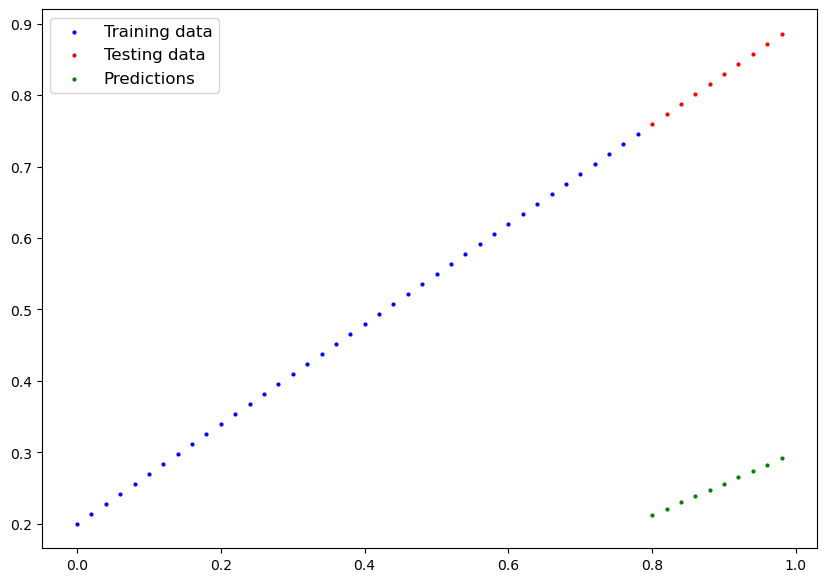

In [13]:
plot_predictions(predictions=y_preds)

## Training Model Intuition

### General steps involved in training model:-

* **Loss Function:** A function to measure the error between the predicted labels and actual labels.
* **Optimizer:** Takes into account the loss of a model and adjusts models parameters (weights, bias) to improve loss function (minimize loss).

### Setting up Loss and Optimizer for Linear model

In [14]:
# initializing loss function
loss_fn = nn.L1Loss()

# initializing optimizer
SGD_optimizer = pt.optim.SGD(params=model.parameters(),
                             momentum=0.9, lr=1e-3) # 1e-3 => 0.001 is the value it would increase/decrease in weight and bias


### Setting up Training Loop

Steps:

0. Loop through data.
1. Forward pass. (using forward function, traverse data through model).
2. Calculate the loss (compare forward pass predictions to ground truth labels).
3. Optimizer zero grad.
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss. **(backpropagation)**
5. Optimizer step - use the optimizer to adjust model's parameters to try and improve the loss. **(Gradient Descent)**

In [15]:
# building training loop
epochs = 15

# 0. Loop through the data.
for epoch in range(epochs):

    # set model to training mode (set to train model by default)
    model.train()
    #model.eval() # set model to eval mode and doesn't track GD.

    # 1. forward pass data
    y_pred = model(X_train)

    # 2. compute Loss
    loss = loss_fn(y_pred, y_train)
    print(f"Epoch = {epoch}, Loss = {loss}.")

    # 3. Optimizer zero grad
    SGD_optimizer.zero_grad()

    # 4. Backward propagation on the loss with respect to the parameters of the model.
    loss.backward()

    # 5. Step the optimizer (gradient descent)
    """By defaultm how the optimier changes will accumulate, hence gradient needs to be set to zero before next step."""
    SGD_optimizer.step()

    # 6. Testing model
    model.eval()

    # display model parameters
    print(model.state_dict())

Epoch = 0, Loss = 0.4407154619693756.
OrderedDict({'weights': tensor([0.4396]), 'bias': tensor([-0.1380])})
Epoch = 1, Loss = 0.43956342339515686.
OrderedDict({'weights': tensor([0.4404]), 'bias': tensor([-0.1361])})
Epoch = 2, Loss = 0.43737441301345825.
OrderedDict({'weights': tensor([0.4414]), 'bias': tensor([-0.1334])})
Epoch = 3, Loss = 0.43425217270851135.
OrderedDict({'weights': tensor([0.4428]), 'bias': tensor([-0.1300])})
Epoch = 4, Loss = 0.4302900731563568.
OrderedDict({'weights': tensor([0.4444]), 'bias': tensor([-0.1259])})
Epoch = 5, Loss = 0.42557209730148315.
OrderedDict({'weights': tensor([0.4462]), 'bias': tensor([-0.1212])})
Epoch = 6, Loss = 0.42017388343811035.
OrderedDict({'weights': tensor([0.4482]), 'bias': tensor([-0.1160])})
Epoch = 7, Loss = 0.4141632914543152.
OrderedDict({'weights': tensor([0.4505]), 'bias': tensor([-0.1103])})
Epoch = 8, Loss = 0.4076017439365387.
OrderedDict({'weights': tensor([0.4528]), 'bias': tensor([-0.1042])})
Epoch = 9, Loss = 0.400

In [16]:
with pt.inference_mode():
    y_preds_1 = model(X_test)

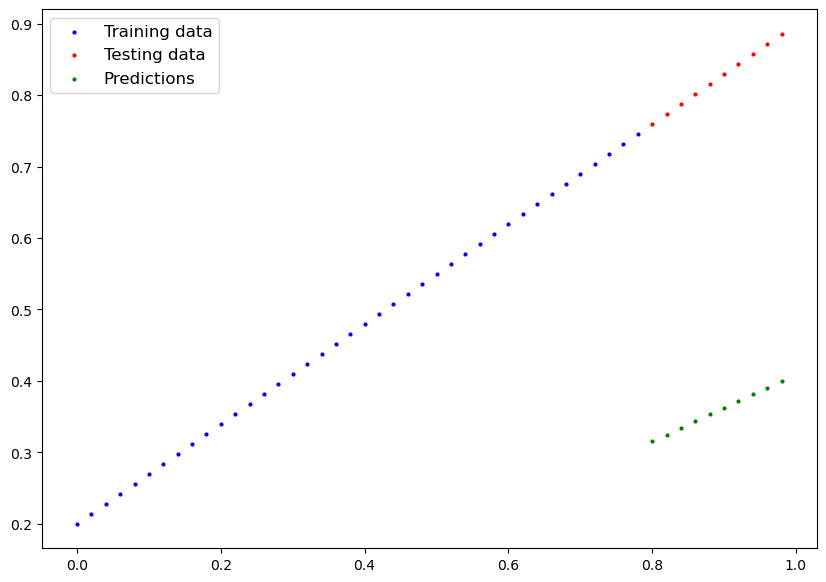

In [17]:
plot_predictions(predictions=y_preds_1)

In [18]:
epochs = 210

epoch_count = []
train_loss_values = []
test_loss_values = []

for epoch in range(epochs):
    epoch_count.append(epoch)
    # set model to training mode
    model.train()

    # 1. forward pass data
    y_pred_1 = model(X_train)

    # 2. compute loss
    train_loss = loss_fn(y_pred_1, y_train)
    train_loss_values.append(train_loss)

    # 3. optimizer zero grad
    SGD_optimizer.zero_grad()

    # 4. backward propagation
    train_loss.backward()

    # 5. step the optimizer
    SGD_optimizer.step()

    # 6. testing model
    model.eval()
    with pt.inference_mode():
        # 1. Do the forward pass
        test_preds = model(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_preds, y_test)
        test_loss_values.append(test_loss)

        # 3. Display the loss
        if epoch % 10 == 0:
            print(f"Epoch = {epoch} | loss = {loss} | Test_loss = {test_loss}")

            # display model parameters
            print(model.state_dict())

Epoch = 0 | loss = 0.3593897521495819 | Test_loss = 0.45433154702186584
OrderedDict({'weights': tensor([0.4730]), 'bias': tensor([-0.0523])})
Epoch = 10 | loss = 0.3593897521495819 | Test_loss = 0.33425402641296387
OrderedDict({'weights': tensor([0.5078]), 'bias': tensor([0.0368])})
Epoch = 20 | loss = 0.3593897521495819 | Test_loss = 0.20464619994163513
OrderedDict({'weights': tensor([0.5453]), 'bias': tensor([0.1330])})
Epoch = 30 | loss = 0.3593897521495819 | Test_loss = 0.07282464951276779
OrderedDict({'weights': tensor([0.5838]), 'bias': tensor([0.2306])})
Epoch = 40 | loss = 0.3593897521495819 | Test_loss = 0.010463911108672619
OrderedDict({'weights': tensor([0.6073]), 'bias': tensor([0.2720])})
Epoch = 50 | loss = 0.3593897521495819 | Test_loss = 0.047676004469394684
OrderedDict({'weights': tensor([0.6024]), 'bias': tensor([0.2392])})
Epoch = 60 | loss = 0.3593897521495819 | Test_loss = 0.05315583199262619
OrderedDict({'weights': tensor([0.6117]), 'bias': tensor([0.2254])})
Epoc

In [19]:
with pt.inference_mode():
    y_preds_2 = model(X_test)

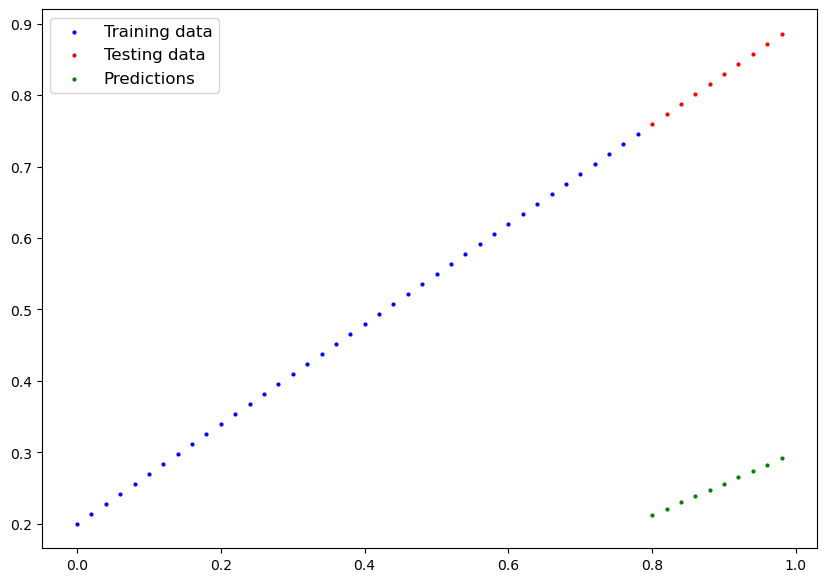

In [20]:
plot_predictions(predictions=y_preds)

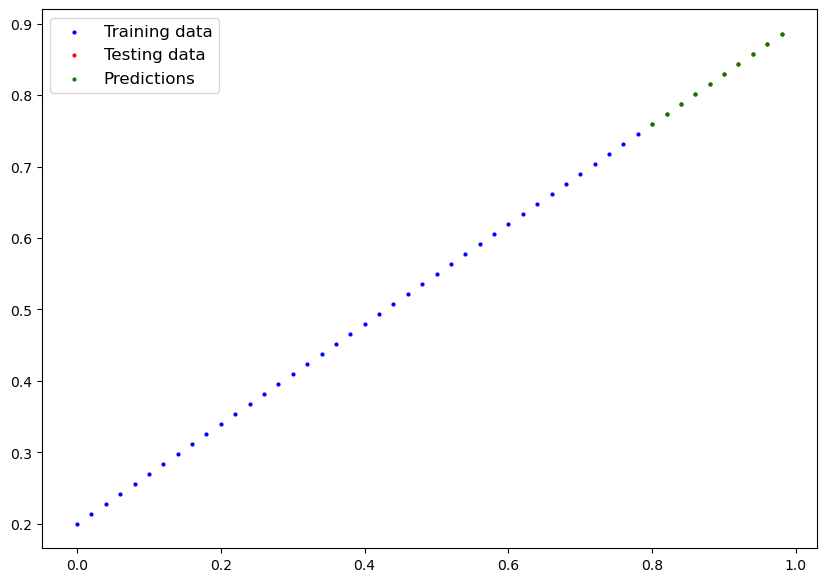

In [21]:
plot_predictions(predictions=y_preds_2)

In [22]:
weight, bias

(0.7, 0.2)

In [23]:
model.state_dict()

OrderedDict([('weights', tensor([0.6999])), ('bias', tensor([0.1999]))])

### Ploting Loss curve

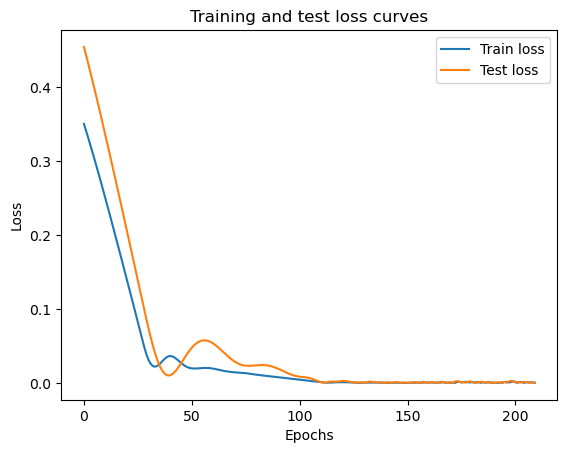

In [24]:
# plot loss curve
import numpy as np
plt.plot(epoch_count, np.array(pt.tensor(train_loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, np.array(pt.tensor(test_loss_values).numpy()), label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

## Saving and loading Pytorch Model

Three main methods for saving and loading models in Pytorch:

1. `torch.save()`: to save pytorch object in python's pickle format.
2. `torch.load()`: to load a saved pytorch object.
3. `torch.nn.Module.load_state_dict()`: this allows to load a model's saved state dictionary.

In [26]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("../models/scratch_LR_model/")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model Save Path
MODEL_NAME = "01_pytorch_workflow_initial_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(MODEL_SAVE_PATH)

print(f"saving {MODEL_NAME} to path {MODEL_SAVE_PATH}")
pt.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)

../models/scratch_LR_model/01_pytorch_workflow_initial_model.pth
saving 01_pytorch_workflow_initial_model.pth to path ../models/scratch_LR_model/01_pytorch_workflow_initial_model.pth


In [27]:
# loading pytorch model
LR_model = LinearRegressionModel()
LR_model.load_state_dict(pt.load(MODEL_SAVE_PATH, weights_only=True))
LR_model.eval()

LinearRegressionModel()

In [28]:
with pt.inference_mode():
    LR_y_preds = LR_model(X_test)

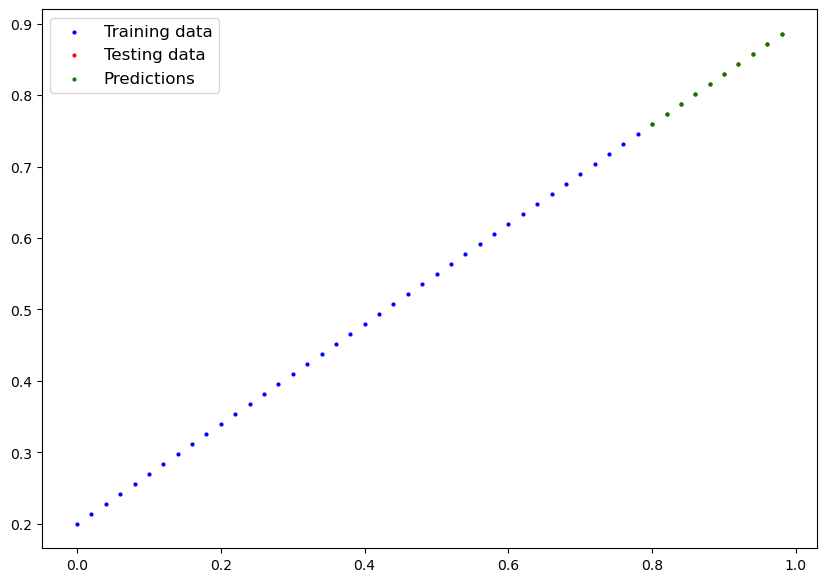

In [29]:
plot_predictions(predictions=LR_y_preds)